<a href="https://colab.research.google.com/github/ElenaGomezB/AA_PRACTICA1_GRUPO_10/blob/main/Practica2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**PRÁCTICA 2 - REDES CONVOLUCIONALES**
Grupo 10

Elena Gómez 

Ana Muñoz

# **Objetivo**

El  objetivo  de  esta  práctica  es  diseñar,  configurar  y  entrenar  un  modelo    Redes  de Neuronas Convolucionales. 

Crearemos un modelo  de Red  de  Neuronas  Convolucionales  que  sea  capaz  de  reconocer  y clasificar imágenes  de  ropa  en  sus  diferentes  tipologías.  Este  modelo  será  definido, 
configurado, entrenado, evaluado y mejorado para posteriormente usarlo para hacer predicciones.  

Usaremos el conjunto de datos Fashion-MNIST, precargado en Keras.
Fashion-MNIST  es  un  conjunto  de  datos  de  las  imágenes  de  los  artículos  de  Zalando. El conjunto de datos contiene 70K imágenes en escala de grises en 10 categorías.  Estas  imágenes  muestran  prendas  individuales  de  ropa  en  baja  resolución (28 x 28 píxeles)

Se usan 60K imágenes para entrenar la red y 10K imágenes para evaluar la precisión con la que la red aprende a clasificar las imágenes

- Importamos **tensorflow** y comprobamos que la versión es 2.0.0 o superior 

In [1]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)#

2.7.0


- **Datos Fashion-MNIST**

A continuación, cargamos las imágenes y creamos un vector de 10 elementos en el que a cada posición se le asigna el nombre de cada prenda. ('class_names')





In [2]:
# Importamos las imágenes
from keras.datasets import fashion_mnist


(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Creamos vector con las prendas
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


4431872/4422102 [==============================] - 0s 0us/step


- **Creamos redes convolucionales**

**Caso 2**

In [3]:

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D

model2 = Sequential()
model2.add(Conv2D(64, (7, 7), padding='same', activation='relu', input_shape=(28, 28, 1)))
model2.add(MaxPooling2D((2, 2)))
model2.summary()
#Explicacion summary:
# [(7*7)+1]*64 = 3200 --> Obtenemos 64 matrices de 28*28 al añadirle padding
#7*7 --> Tamaño de la ventana + 1--> umbral
#Lo anterior * 64 filtros
#En el maxpooling obtenemos 64 matriz de 14*14, no sale ningun parámetro ya que 
#no devuelve nada, simplemente aplica operaciones y reduce su tamaño

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        3200      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
Total params: 3,200
Trainable params: 3,200
Non-trainable params: 0
_________________________________________________________________


In [4]:
#añadimos una segunda capa convolucional
model2.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model2.add(MaxPooling2D((2, 2)))
model2.summary()
#73856 =((3*3*64)+1)*128 --> matrices de 14*14
#3*3(tamaño ventana)*64(filtros anteriores)+1(umbral)*128(filtros nuevos)
#Con el Maxpooling obtenemos matrices de 7*7

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        3200      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                             
                                                                 
Total params: 77,056
Trainable params: 77,056
Non-trainable params: 0
_________________________________________________________________


In [5]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

model2.add(Flatten())
model2.add(Dense(65, activation='relu'))
model2.add(Dense(10, activation='softmax'))
model2.summary()
#Flatten:
#Antes tenemos que ajustar los tensores a la entrada de la capa
#densa. Pasar de un tensor 3D a uno 1D (aplanar).
#Nuestra salida (4,4,128) se debe pasar a un vector de 
#(4x4x128=2048) antes de aplicar softmax)
#Primera capa densa:
#(65*2048)+65 = 133185
#Segunda capa densa(softmax):
#(10*65)+10 = 660

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        3200      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 65)                4

In [6]:
#Antes de compilar y entrenar los modelos, preparamos los datos
from keras.utils.np_utils import to_categorical
import tensorflow as tf

#fashion_mnist = tf.keras.datasets.fashion_mnist
#(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

print (train_images.shape)
print (train_labels.shape)
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

#etiquetas
#model2.add(Flatten(input_shape=(28,28)))

print (train_images.shape)
print (train_labels.shape)



(60000, 28, 28)
(60000,)
(60000, 28, 28, 1)
(60000,)


In [7]:
model2.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

model2.fit(train_images, train_labels,
          batch_size=100,
          epochs=5,
          verbose=1)

test_loss, test_acc = model2.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

Epoch 1/5
600/600 [==============================] - 16s 12ms/step - loss: 1.0778 - accuracy: 0.6261
Epoch 2/5
600/600 [==============================] - 7s 12ms/step - loss: 0.6472 - accuracy: 0.7634
Epoch 3/5
600/600 [==============================] - 7s 11ms/step - loss: 0.5662 - accuracy: 0.7948
Epoch 4/5
600/600 [==============================] - 7s 11ms/step - loss: 0.5169 - accuracy: 0.8126
Epoch 5/5
313/313 [==============================] - 2s 5ms/step - loss: 0.4859 - accuracy: 0.8228
Test accuracy: 0.8227999806404114


**Caso 3**

In [8]:
#from tensorflow.keras import Sequential
#from tensorflow.keras.layers import Conv2D
#from tensorflow.keras.layers import MaxPooling2D

model3 = Sequential()
model3.add(Conv2D(64, (7, 7), padding = 'same', activation='relu', input_shape=(28, 28, 1)))
model3.add(MaxPooling2D((2, 2)))
model3.summary()
#Explicacion summary:
# [(7*7)+1]*64 = 3200 --> Obtenemos 64 matrices de 22*22
#7*7 --> Tamaño de la ventana + 1--> umbral
#Lo anterior * 64 filtros
#En el maxpooling obtenemos 64 matriz de 11*11, no sale ningun parámetro ya que 
#no devuelve nada, simplemente aplica operaciones y reduce su tamaño

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        3200      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
Total params: 3,200
Trainable params: 3,200
Non-trainable params: 0
_________________________________________________________________


In [9]:
model3.add(Conv2D(128, (3, 3), padding = 'same', activation='relu'))
model3.add(MaxPooling2D((2, 2)))
model3.summary()
#73856 = ((3*3*64)+1)*128 --> matrices de 14*14
#3*3(tamaño ventana)*64(filtros anteriores)+1(umbral)*128(filtros nuevos)
#Con el Maxpooling obtenemos matrices de 7*7

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        3200      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                             
                                                                 
Total params: 77,056
Trainable params: 77,056
Non-trainable params: 0
_________________________________________________________________


In [10]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

model3.add(Flatten())
model3.add(Dense(65, activation='relu'))
model3.add(Dense(10, activation='softmax'))
model3.summary()
#Flatten:
#Antes tenemos que ajustar los tensores a la entrada de la capa
#densa. Pasar de un tensor 3D a uno 1D (aplanar).
#Nuestra salida (4,4,128) se debe pasar a un vector de 
#(4x4x128=2048) antes de aplicar softmax)
#Primera capa densa:
#(65*2048)+65 = 133185
#Segunda capa densa(softmax):
#(10*65)+10 = 660

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        3200      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 6272)              0         
                                                                 
 dense_2 (Dense)             (None, 65)               

In [11]:
model3.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model3.fit(train_images, train_labels,
          batch_size=100,
          epochs=5,
          verbose=1)

test_loss, test_acc = model3.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

Epoch 1/5
600/600 [==============================] - 8s 12ms/step - loss: 0.4746 - accuracy: 0.8314
Epoch 2/5
600/600 [==============================] - 7s 12ms/step - loss: 0.3033 - accuracy: 0.8896
Epoch 3/5
600/600 [==============================] - 7s 12ms/step - loss: 0.2603 - accuracy: 0.9050
Epoch 4/5
600/600 [==============================] - 7s 12ms/step - loss: 0.2309 - accuracy: 0.9155
Epoch 5/5
313/313 [==============================] - 2s 5ms/step - loss: 0.2575 - accuracy: 0.9040
Test accuracy: 0.9039999842643738


#**PREDICCIONES**

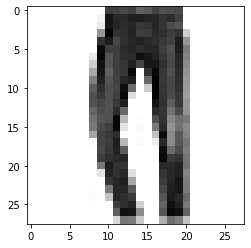

(60000, 28, 28)
(60000,)
(60000, 28, 28, 1)
(60000,)
[9 2 1 ... 8 1 5]
1


In [12]:
# Veamos el elemento 6 de test y pintémoslo con matplotlib
from keras.datasets import fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
import matplotlib.pyplot as plt

digit = test_images[5]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()
print (train_images.shape)
print (train_labels.shape)
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255
print (train_images.shape)
print (train_labels.shape)

from keras.utils.np_utils import to_categorical

print(test_labels)
print(test_labels[5])





**modelo 2**

In [13]:

predictions2 = model2.predict(test_images)
print(np.argmax(predictions2[5]))
print(predictions2[5])
np.sum(predictions2[5])
print(predictions2)

1
[2.7606240e-04 9.9892658e-01 3.6040252e-05 1.9289200e-04 4.9443415e-04
 1.1304259e-08 7.1989991e-05 8.8523485e-08 2.0254931e-06 7.8047337e-09]
[[2.9648720e-05 1.7743580e-05 5.4448832e-05 ... 1.5331425e-01
  1.2118675e-02 7.3257393e-01]
 [8.4313375e-05 1.6294816e-06 9.8971820e-01 ... 5.8456018e-10
  8.8369798e-06 1.7354641e-10]
 [1.2219828e-05 9.9997115e-01 3.9949796e-07 ... 1.6327448e-08
  2.1850539e-08 3.3451272e-10]
 ...
 [1.9283853e-02 8.2447070e-05 2.3986078e-03 ... 8.8660476e-05
  9.3274599e-01 3.2792252e-06]
 [2.6475426e-04 9.9070615e-01 1.3490301e-04 ... 2.9728099e-05
  3.3803667e-06 7.2521248e-06]
 [2.8685475e-04 3.9708405e-04 1.1612396e-03 ... 3.1787217e-02
  2.1486817e-02 4.9627721e-03]]


**modelo 3**

In [14]:

predictions3 = model3.predict(test_images)
print(np.argmax(predictions3[5]))
print(predictions3[5])
np.sum(predictions3[5])
print(predictions3)

1
[2.1761750e-04 9.9963963e-01 1.7183935e-05 1.4261479e-05 8.6071432e-06
 1.3818509e-05 2.1997881e-05 3.7228595e-10 6.6775792e-05 8.8110795e-08]
[[1.9475912e-07 4.2459379e-07 2.9339594e-07 ... 1.2134245e-04
  2.5606771e-06 9.9680603e-01]
 [3.8297272e-05 4.5791682e-10 9.9991405e-01 ... 2.2819621e-10
  2.9762653e-08 9.3107335e-09]
 [2.7776714e-05 9.9996519e-01 2.5271227e-08 ... 4.7068679e-14
  1.8503181e-08 3.0845958e-11]
 ...
 [7.9938445e-06 4.9466348e-10 7.8309740e-06 ... 6.7061571e-08
  9.9998057e-01 9.0292112e-09]
 [5.8460755e-05 9.9987149e-01 3.2095052e-06 ... 5.7577421e-10
  5.3290297e-08 3.2748313e-09]
 [3.2482413e-03 9.7016891e-04 1.1297051e-02 ... 1.1978548e-01
  1.7071599e-01 5.2713021e-03]]


14 primeras imagenes

In [15]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)    

  predicted_label = np.argmax(predictions_array)
  if predicted_label.all() == true_label.all():
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#00FF00")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('black')

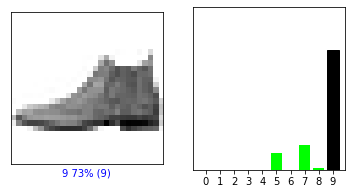

<Figure size 432x288 with 0 Axes>

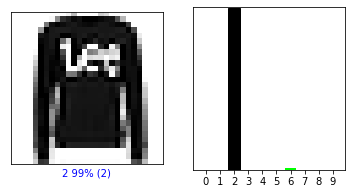

<Figure size 432x288 with 0 Axes>

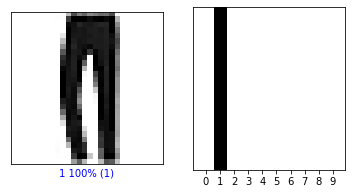

<Figure size 432x288 with 0 Axes>

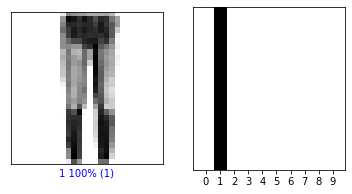

<Figure size 432x288 with 0 Axes>

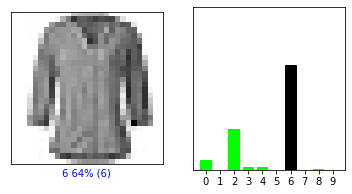

<Figure size 432x288 with 0 Axes>

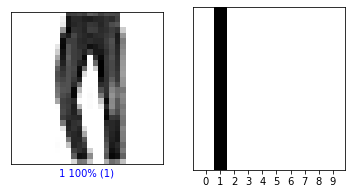

<Figure size 432x288 with 0 Axes>

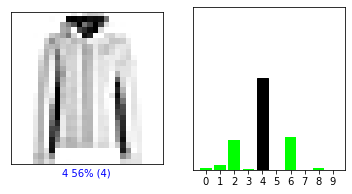

<Figure size 432x288 with 0 Axes>

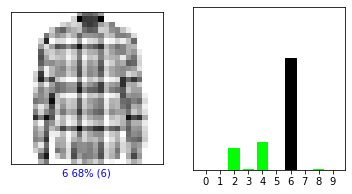

<Figure size 432x288 with 0 Axes>

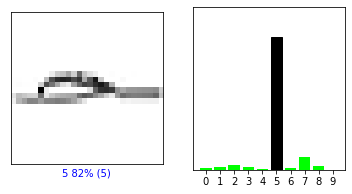

<Figure size 432x288 with 0 Axes>

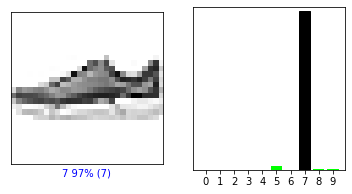

<Figure size 432x288 with 0 Axes>

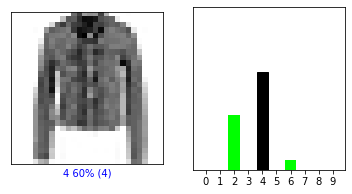

<Figure size 432x288 with 0 Axes>

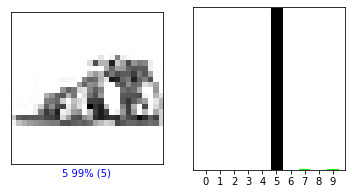

<Figure size 432x288 with 0 Axes>

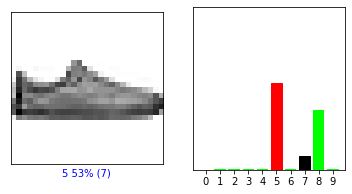

<Figure size 432x288 with 0 Axes>

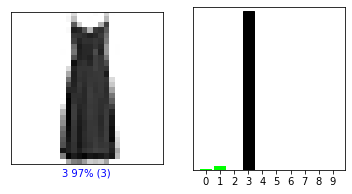

<Figure size 432x288 with 0 Axes>

In [16]:
for i in range(14):
    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1)
    plot_image(i, predictions2[i], test_labels, test_images.reshape(10000,28,28))
    plt.subplot(1,2,2)
    plot_value_array(i, predictions2[i],  test_labels)
    plt.show()
    plt.clf()

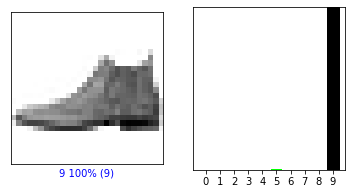

<Figure size 432x288 with 0 Axes>

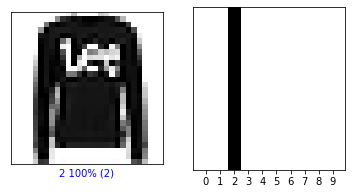

<Figure size 432x288 with 0 Axes>

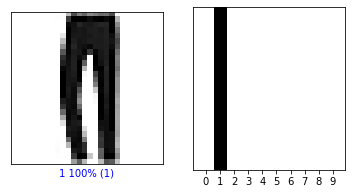

<Figure size 432x288 with 0 Axes>

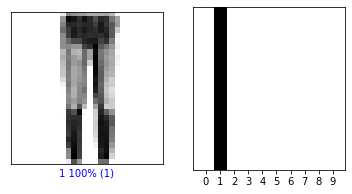

<Figure size 432x288 with 0 Axes>

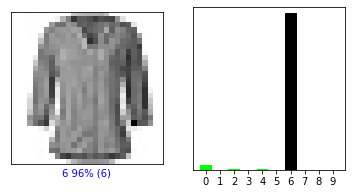

<Figure size 432x288 with 0 Axes>

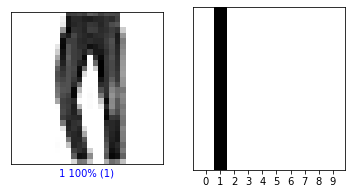

<Figure size 432x288 with 0 Axes>

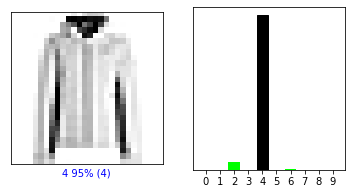

<Figure size 432x288 with 0 Axes>

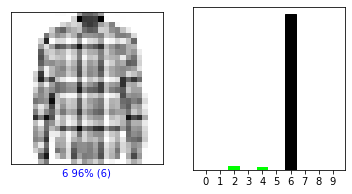

<Figure size 432x288 with 0 Axes>

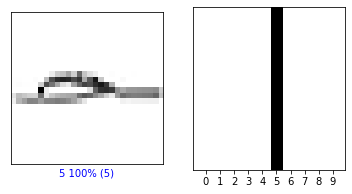

<Figure size 432x288 with 0 Axes>

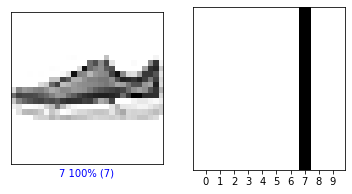

<Figure size 432x288 with 0 Axes>

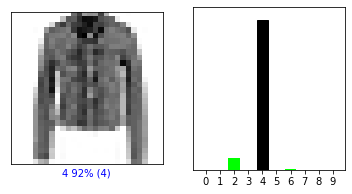

<Figure size 432x288 with 0 Axes>

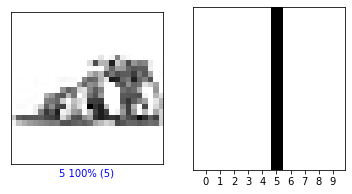

<Figure size 432x288 with 0 Axes>

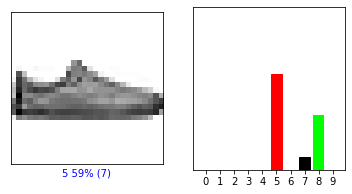

<Figure size 432x288 with 0 Axes>

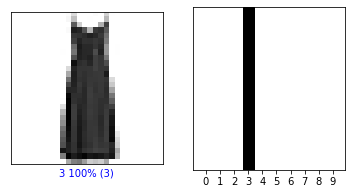

<Figure size 432x288 with 0 Axes>

In [17]:
for i in range(14):
    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1)
    plot_image(i, predictions3[i], test_labels, test_images.reshape(10000,28,28))
    plt.subplot(1,2,2)
    plot_value_array(i, predictions3[i],  test_labels)
    plt.show()
    plt.clf()

# **Callbacks API**
Una "callback" o devolución de llamada es un objeto que puede realizar acciones en varias etapas del entrenamiento (por ejemplo, al comienzo o al final de una época, antes o después de un solo lote, etc.).

Puede usar devoluciones de llamada para:

 

*   Escribir registros de TensorBoard después de cada lote de entrenamiento     para monitorear sus métricas
*   Guarde periódicamente el modelo en el disco
*   Hacer paradas tempranas
*   Obtener una vista de los estados internos y las estadísticas de un modelo durante el entrenamiento
*   etc


*   **Creamos un modelo implementando callback**

In [28]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

from keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

modelnuevo = Sequential()
modelnuevo.add(Conv2D(64, (7, 7), padding='same', activation='relu', input_shape=(28, 28, 1)))
modelnuevo.add(MaxPooling2D((2, 2)))

modelnuevo.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
modelnuevo.add(MaxPooling2D((2, 2)))

modelnuevo.add(Flatten())
modelnuevo.add(Dense(65, activation='relu'))
modelnuevo.add(Dense(10, activation='softmax'))
modelnuevo.summary()

#Antes de compilar y entrenar los modelos, preparamos los datos
from keras.utils.np_utils import to_categorical
import tensorflow as tf

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

modelnuevo.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

#tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="./logs")
def scheduler(epoch, lr):
    if epoch < 1:
        return lr
    else:
        return lr * tf.math.exp(-0.1)


callback = tf.keras.callbacks.LearningRateScheduler(scheduler)


modelnuevo.fit(train_images, train_labels,
          batch_size=100,
          epochs=5,
          callbacks=[callback])

test_loss, test_acc = modelnuevo.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 28, 28, 64)        3200      
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 14, 14, 128)       73856     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 7, 7, 128)        0         
 g2D)                                                            
                                                                 
 flatten_9 (Flatten)         (None, 6272)              0         
                                                                 
 dense_18 (Dense)            (None, 65)               